# Graph Analysis.

In [1]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from nose.tools import assert_equal, assert_almost_equal, assert_is_instance, assert_true, assert_false
from numpy.testing import assert_array_equal, assert_array_almost_equal

## Florentine Families Social Network

In this assignment, we'll be looking at the social network of the [Florentine Families](https://en.wikipedia.org/wiki/Category:Families_of_Florence).

In [2]:
g=nx.florentine_families_graph()

- Use `networkx.draw()` to draw the social network of the Florentine families.

    ![](./images/FF_graph.png)

In [3]:
def draw_graph(graph):
    '''
    Draws the social network of the Florentine families.
    
    Paramters
    ---------
    graph: A networkx.Graph instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    # YOUR CODE HERE
    fig, ax = plt.subplots(figsize=(12, 12))
    nx.draw(graph, with_labels=True)
    return ax

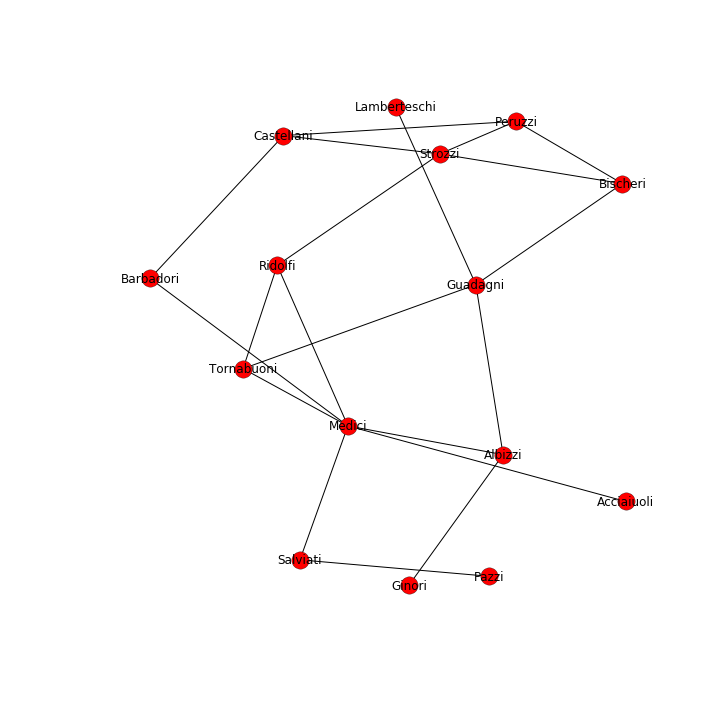

In [4]:
ax1 = draw_graph(g)
plt.show()

In [5]:
assert_is_instance(ax1, mpl.axes.Axes)
assert_equal(ax1.collections[0].get_offsets().shape[0], len(g.nodes()))
assert_equal(len(ax1.collections[1].get_segments()), len(g.edges()))

## Measures of centrality

- Compute the degree centrality of each node (using [`degree_centrality()`](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.degree_centrality.html#networkx.algorithms.centrality.degree_centrality) ) , the [betweenness centrality](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html) and [closeness centrality](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality).

In [6]:
def get_centrality(graph):
    '''
    Computes the degree of each node.
    
    Paramters
    ---------
    graph: A networkx.Graph instance.

    Returns
    -------
    A tuple of dicts
    '''
    
    # YOUR CODE HERE
    degree = nx.degree_centrality(graph)
    betweenness = nx.betweenness_centrality(graph)
    closeness = nx.closeness_centrality(graph)
    return degree, betweenness, closeness

In [7]:
degree, betweenness, closeness = get_centrality(g)
print('Node \t Degree \t Betweenness \t Closeness')
for node in degree:
    print('{0:} \t {1:7f} \t {2:7f} \t {3:7f}'.format(node, degree[node], betweenness[node], closeness[node]))

Node 	 Degree 	 Betweenness 	 Closeness
Tornabuoni 	 0.214286 	 0.091575 	 0.482759
Barbadori 	 0.142857 	 0.093407 	 0.437500
Guadagni 	 0.285714 	 0.254579 	 0.466667
Pazzi 	 0.071429 	 0.000000 	 0.285714
Castellani 	 0.214286 	 0.054945 	 0.388889
Strozzi 	 0.285714 	 0.102564 	 0.437500
Salviati 	 0.142857 	 0.142857 	 0.388889
Acciaiuoli 	 0.071429 	 0.000000 	 0.368421
Peruzzi 	 0.214286 	 0.021978 	 0.368421
Ridolfi 	 0.214286 	 0.113553 	 0.500000
Bischeri 	 0.214286 	 0.104396 	 0.400000
Lamberteschi 	 0.071429 	 0.000000 	 0.325581
Ginori 	 0.071429 	 0.000000 	 0.333333
Albizzi 	 0.214286 	 0.212454 	 0.482759
Medici 	 0.428571 	 0.521978 	 0.560000


In [8]:
assert_is_instance(degree, dict)
assert_equal(sorted(list(degree.keys())), ['Acciaiuoli', 'Albizzi', 'Barbadori', 'Bischeri', 'Castellani', 
                                           'Ginori', 'Guadagni', 'Lamberteschi', 'Medici', 'Pazzi', 'Peruzzi', 
                                           'Ridolfi', 'Salviati', 'Strozzi', 'Tornabuoni'])
assert_almost_equal(degree['Ginori'], 0.071429,3)
assert_almost_equal(betweenness['Ridolfi'], 0.113553,3)
assert_almost_equal(closeness['Albizzi'], 0.482759,3)

We see that two families ('Medici' and 'Guadagni') have the highest betweennness values. High betweenness values signify "brokerage" roles in the network. To visualize this,

- Color each node according to whether it is a friend of the 'Medici' family node or the 'Guadagni' family node. 

If someone is a friend of both families, classify the node as a friend of the 'Guadagni' family.

![](./images/friends_graph.png)

We could draw the nodes, edges, and labels individually using `draw_networkx_nodes()`, `draw_networkx_edges()`, and `draw_networkx_labels()`. But I think it's simpler to draw all nodes, edges, and labels by using `draw()`, and then overwrite the nodes with different colors by using `draw_networkx_nodes()`.

In the following code cell,

- Use `networkx.draw()` to draw a graph,
- Use `networkx.draw_networkx_nodes()` to make the friends of node 'Medici' different colors, and
- Use `networkx.draw_networkx_nodes()` to make the friends of node 'Guadagni' different colors.

It is important to draw the graph in this specific order to pass the unit tests.

In [34]:
def draw_graph_friends(graph):
    '''
    Draws the social network of the Florentine families,
    but uses different colors for friends of node 'Medici' and node 'Guadagni'.
    
    Paramters
    ---------
    graph: A networkx.Graph instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    # YOUR CODE HERE
    Med_friends = ['Medici']
    Guad_friends = ["Guadagni"]

    for node in graph.nodes():
        if node!="Guadagni" and graph.has_edge(u='Guadagni',v=node):
            Guad_friends.append(node)
        if node!="Medici" and graph.has_edge(u='Medici',v=node):
            Med_friends.append(node)

    fig, ax = plt.subplots()
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos= pos,with_labels=True)
    nx.draw_networkx_nodes(graph,pos=pos, nodelist=Med_friends, node_color='b')
    nx.draw_networkx_nodes(graph,pos=pos, nodelist=Guad_friends , node_color='g')

    return ax

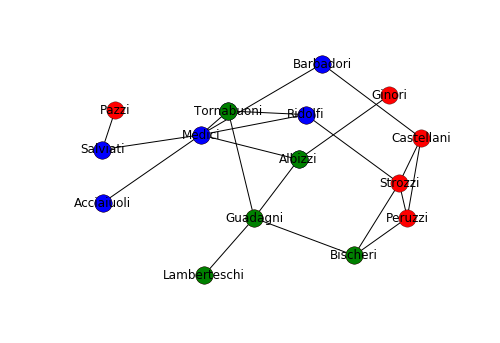

In [35]:
ax2 = draw_graph_friends(g)
plt.show()

In [36]:
assert_is_instance(ax2, mpl.axes.Axes)
assert_equal(ax2.collections[0].get_offsets().shape[0], len(g.nodes()))
assert_equal(len(ax2.collections[1].get_segments()), len(g.edges()))
assert_equal(len(ax2.collections[2].get_offsets()), 7)
assert_equal(len(ax2.collections[3].get_offsets()), 5)
assert_false(np.all(ax2.collections[2].get_facecolor() == ax2.collections[3].get_facecolor()))

## Cliques
Identify the cliques in which a given node is participating.

In [37]:
def find_node_cliques(graph,node):
    '''
    Returns the cliques from the graph in which `node` is participating.
    
    Paramters
    ---------
    graph: A networkx.Graph instance.
    
    Returns
    -------
    List of cliques containing `node`.
    '''
    
    # YOUR CODE HERE
    cliques = []
    for clique in nx.find_cliques(g):
        if node in clique:
            cliques.append(clique)
    
    return cliques

In [38]:
cliques1 = find_node_cliques(g,'Medici')

print("Cliques of which the Medici family node is a part of:")
print(60*"-")
for clique in cliques1:
    print(clique)

cliques2 = find_node_cliques(g,'Guadagni')

print("\nCliques of which the Guadagni family node is a part of:")
print(60*"-")
for clique in cliques2:
    print(clique)

Cliques of which the Medici family node is a part of:
------------------------------------------------------------
['Medici', 'Acciaiuoli']
['Medici', 'Tornabuoni', 'Ridolfi']
['Medici', 'Albizzi']
['Medici', 'Barbadori']
['Medici', 'Salviati']

Cliques of which the Guadagni family node is a part of:
------------------------------------------------------------
['Lamberteschi', 'Guadagni']
['Guadagni', 'Tornabuoni']
['Guadagni', 'Albizzi']
['Guadagni', 'Bischeri']


In [41]:
assert_is_instance(cliques1, list)
assert_equal(len(cliques1),5)
assert_true((['Medici', 'Acciaiuoli'] in cliques1) or (['Acciaiuoli', 'Medici'] in cliques1))
assert_true((['Medici', 'Salviati'] in cliques1) or (['Salviati', 'Medici'] in cliques1))
assert_is_instance(cliques2, list)
assert_equal(len(cliques2),4)
assert_true((['Guadagni', 'Albizzi'] in cliques2) or (['Albizzi', 'Guadagni'] in cliques2))
assert_true((['Guadagni', 'Bischeri'] in cliques2) or (['Bischeri', 'Guadagni'] in cliques2))
